# Central Platform Simulation

### Dependency Syncronization

##### Downloading Libraries

In [526]:
import sys

# Installing numpy
!{sys.executable} -m pip install numpy

# Installing pandas
!{sys.executable} -m pip install pandas

# Installing matplotlib
!{sys.executable} -m pip install matplotlib

#Installing tqdm
!{sys.executable} -m pip install tqdm



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Importing packages

In [527]:
# Import Statistic Libraries
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt

# Import Utility Libraries
from typing                 import List
from typing                 import Dict
from random                 import choice, random, uniform
from time                   import sleep, time
from tqdm                   import tqdm
from uuid                   import uuid4

### Simulation Definition

##### Defining Settings


In [528]:
# structure of settings -> []
settings : Dict[str, Dict[str, list]] = {
    "small": {
        "delay": [0.09, 0.006, 0.002, 0.008, 0.003, 0.01, 0.02, 0.03 , 0.007],
        "clients": [10, 15, 20],
        "request_size": [908.37, 1362.41, 1378.55, 1216.62, 1397.12, 1080.28, 1347.66, 771.84, 1210.19, 1132.47, 1121.89, 727.93, 1252.64, 1270.73, 1229.83, 681.42, 1336.58, 1220.45, 618.25, 1066.06, 614.17, 1087.92, 1129.98, 1291.54, 1142.19, 795.73, 1137.28, 1144.31, 1420.39, 798.51, 1074.12, 1403.45, 1092.63, 1071.97, 1234.51, 1251.37, 1230.16, 731.79, 991.47, 1256.16, 749.84],
        "table_amount": 20,
        "cycles": 30,
        "requests": 100
    },
    "medium": {
        "delay": [0.09, 0.006, 0.002, 0.008, 0.003, 0.01, 0.02, 0.03 , 0.007],
        "clients": [20, 30, 50],
        "request_size": [1372.54, 1512.23, 1261.89, 1639.67, 1155.12, 1212.45, 1689.34, 1445.76, 1399.88, 1089.23, 1577.43, 1755.69, 1345.98, 1234.76, 1650.32, 1123.56, 1498.45, 1750.12, 1023.89, 1289.76, 1756.23, 1199.45, 1323.67, 1545.21, 1687.99, 1290.34, 1376.65, 1467.34, 1611.78, 1712.56, 1211.99, 1122.34, 1423.78, 1544.23, 1665.45, 1734.56, 1089.12, 1512.67, 1311.45, 1789.56, 1066.23],
        "table_amount": 20,
        "cycles": 50,
        "requests": 300

    },
    "large": {
        "delay": [0.09, 0.006, 0.002, 0.008, 0.003, 0.01, 0.02, 0.03 , 0.007],
        "clients": [50, 60, 80],
        "request_size": [1795.62, 1768.44, 1892.33, 1548.11, 1203.78, 1444.59, 1821.29, 1382.67, 1347.73, 1862.59, 1304.72, 1401.99, 2034.13, 1918.86, 1976.56, 1234.45, 1596.24, 1663.41, 1739.98, 1912.12, 1265.37, 1956.79, 1360.58, 1661.87, 1229.21, 1483.47, 1945.26, 1731.16, 1746.15, 1295.78, 1815.32, 1993.24, 2001.34, 1154.12, 1938.84, 1168.07, 1634.07, 1820.42, 1741.61, 2071.97, 1624.98, 1531.03],
        "table_amount": 20,
        "cycles": 100,
        "requests": 500
    },
}

##### Defining DataFrame Structure

In [529]:
request_data : Dict[str, list] = {
    "request_id" : [],
    "request_client": [],
    "request_size": [],
    "request_delay": [],
    "request_diserialization": [],
    "request_serialization": []
}


response_data : Dict[str, list] = {
    "response_id" : [],
    "response_client": [],
    "response_size": [],
    "response_delay": [],
    "response_diserialization": [],
    "response_serialization": []
}

server_data : Dict[str, list] = {
    "processed_request_id": [],
    "processed_response_id": [],
    "processed_db_query_id": []
}

client_data : Dict[str, list] = {
    "issued_request_id": [],
    "processed_request_id": [],
    "is_request_delayed": []
}

cycle_data : Dict[str, list] = {
    "cycle": [],
    "client": [],
    "data_delay": [],
    "data_molding": []

}

##### Defining Data Transfer Objects


In [530]:
# Class that collects inpormation per request and response pair
# format of list -> [id, client, size, delay, deserialization, serialiation]
class DataPackage:
    def __init__(self, issuer: str) -> None:
        self.issuer = issuer
        self.request : list = ["", "", 0, 0, 0, 0]
        self.response : list = ["", "", 0, 0, 0, 0]

    def __str__(self) -> str:
        return self.issuer + " Request: " + str(self.request) + " Response: " + str(self.response)

##### Defining Utility Functions

In [531]:
def saveReqResData(request : DataPackage) -> DataPackage:
    request_id_list = request_data['request_id']
    request_id_list.append(request.request[0])

    request_client_list = request_data['request_client']
    request_client_list.append(request.request[1])

    request_size_list = request_data['request_size']
    request_size_list.append(request.request[2])

    request_delay_list = request_data['request_delay']
    request_delay_list.append(request.request[3])

    request_diserialization_list = request_data['request_diserialization']
    request_diserialization_list.append(request.request[4])

    request_serialization_list = request_data['request_serialization']
    request_serialization_list.append(request.request[5])


    response_id_list = response_data['response_id']
    response_id_list.append(request.response[0])

    response_client_list = response_data['response_client']
    response_client_list.append(request.response[1])

    response_size_list = response_data['response_size']
    response_size_list.append(request.response[2])

    response_delay_list = response_data['response_delay']
    response_delay_list.append(request.response[3])

    response_diserialization = response_data['response_diserialization']
    response_diserialization.append(request.response[4])

    response_serialization_list = response_data['response_serialization']
    response_serialization_list.append(request.response[5])

    return request


def saveCycleData(cycle_name: str, data: DataPackage) -> DataPackage:
    cycle_id = cycle_data["cycle"]
    cycle_id.append(cycle_name)

    cycle_data_client = cycle_data["client"]
    cycle_data_client.append(data.issuer)

    cycle_delay = cycle_data["data_delay"]
    cycle_delay.append(data.request[3] + data.request[4] + data.request[5] + data.response[3] + data.response[4] + data.response[5])

    cycle_molding = cycle_data['data_molding']
    cycle_molding.append(data.request[4] + data.request[5] + data.response[4] + data.response[5])


### Set-up Simulation

##### Settings

In [532]:
simulation_scale: str = input("Enter how big you want the scale of the simulation to be { small, medium, large }: ")


chosen_scale = settings[simulation_scale]

##### Settin-up Data Structure

In [533]:
class Database:
    t_rows = [10, 100, 1_000, 10_000]
    t_cols = [5, 7, 10]
    t_shards = [2,4,6]

    def __init__(self) -> None:
        self.shards : Dict[str, List[Dict[str, List[list]]]] = {}
        for i in range(choice(self.t_shards)):
            self.create_shard("Shard " + str(i))

    def create_shard(self, shard_name: str) -> (str, List[Dict[str, List[list]]]):
        self.shards[shard_name] = []

    def remove_shard(self, shard_name) -> None:
        self.shards.pop(shard_name)

    def add_table(self, shard_name: str, table_name : str) -> Dict[str, List[list]]:
        shard = self.shards.get(shard_name)
        table = {
            table_name: [[0 for i in range(choice(self.t_cols))] for j in range(choice(self.t_rows))]
        }
        shard.append(table)
        return table

    def remove_table(self, shard_name : str, table_name : str) -> None:
        shard = self.shards.get(shard_name)

        for table in shard:
            if table_name in table.keys():
                table.pop(table_name)

class CentralClient:

    def __init__(self, name: str, server ) -> None:
        self.name = name
        self.server = server

    def issue_request(self) -> DataPackage:
        create_request = time()

        data : DataPackage = DataPackage(self.name)

        sleep(uniform(0.04, 0.25))
        send_request = time()
        time_taken = send_request - create_request

        data.request[0] = uuid4()
        data.request[1] = self.name
        data.request[2] = choice([4000, 500, 3000, 3566, 5734, 2432, 1434,4255,8252,357,5743,3562])
        data.request[5] = time_taken

        return self.server.process_request(data)

    def capture_response(self, data: DataPackage) -> DataPackage:
        response_arrival_time = time()
        sleep(uniform(0.05, 0.14))
        response_deserialize = time()

        time_taken = response_deserialize - response_arrival_time
        data.response[4] = time_taken

        start_prop = time()
        sleep(uniform(0.02, 0.15))
        end_prop = time()

        prop_time = end_prop - start_prop

        data.response[3] = prop_time
        return saveReqResData(data)

class CentralServer:

    def __init__(self, database: Database) -> None:
        self.name = "Server"
        self.clients : Dict[str, CentralClient] = {}
        self.database = database

    def __str__(self) -> str:
        return str(self.name)

    def get_client(self,client_name : str ) -> CentralClient:
        for client in self.clients:
            if(client.name == client_name):
                return client

    def add_client(self, client_name: str, client: CentralClient) -> None:
        self.clients[client_name] = client

    def update_information(self, data: DataPackage) -> DataPackage:
        time_start = time()
        sleep(uniform(0.001, 0.21))
        time_end = time()
        time_taken = time_end - time_start
        data.request[3] = time_taken

        return self.issue_response(data)


    def issue_response(self, data: DataPackage) -> DataPackage:
        if( data.issuer in self.clients.keys()):

            create_response = time()
            sleep(uniform(0.001, 0.17))
            serialize_response = time()

            time_taken = serialize_response - create_response
            data.response[0] = uuid4()
            data.response[1] = self.name
            data.response[2] = choice([4000, 500, 3000, 3566, 5734, 2432, 1434,4255,8252,357,5743,3562])
            data.response[5] = time_taken
            client = self.clients.get(data.issuer)
            return client.capture_response(data)



    def process_request(self, data: DataPackage) -> DataPackage:
        get_request = time()
        sleep(uniform(0.02, 0.17))
        deserialized_request = time()

        time_taken = deserialized_request - get_request

        data.request[4] = time_taken

        return self.update_information(data)


##### Setting-up Server and Database

In [534]:
sample_database: Database = Database()

for shard in sample_database.shards:
    for i in range(chosen_scale["table_amount"]):
        sample_database.add_table( shard_name= shard, table_name= "Table " + str(i))
server : CentralServer = CentralServer(database = sample_database)

##### Setting up Clients

In [535]:
clients : Dict[str, CentralClient] = {}

for i in range(choice(chosen_scale.get("clients"))):
    client : CentralClient = CentralClient(name="Client: " + str(i), server = server )
    clients["Client: "+ str(i)] = client


for name, client in clients.items():
    server.add_client(name, client)


### Running the simulation



In [536]:


for cycle in tqdm(range(chosen_scale['cycles']), desc= "Running Simulation: " + str(chosen_scale["cycles"] ) + " Cycles in total", position=0):
        for request in tqdm(range(chosen_scale["requests"]), desc= "Current Cycle: " + str(cycle + 1), position=1):
                sleep(0.001)
                client = choice(list(clients.values()))
                saveCycleData("Cycle: " + str(cycle + 1), client.issue_request())

Running Simulation: 30 Cycles in total: 100%|██████████| 30/30 [30:59<00:00, 61.98s/it]


### Examination of Results

##### Generate Datasets for Statistics


In [537]:
request_dataset = pd.DataFrame(request_data)
response_dataset = pd.DataFrame(response_data)
cycle_dataset = pd.DataFrame(cycle_data)

In [538]:
request_delays = request_dataset[["request_delay", "request_diserialization", "request_serialization"]]
response_delays = response_dataset[["response_delay", "response_diserialization", "response_serialization"]]

In [539]:
cycle_dataset

,cycle,client,data_delay,data_molding
0,Cycle: 1,Client: 9,0.535043,0.399999
1,Cycle: 1,Client: 6,0.472043,0.246008
2,Cycle: 1,Client: 1,0.596035,0.339073
3,Cycle: 1,Client: 1,0.547000,0.326033
4,Cycle: 1,Client: 6,0.629015,0.465019
...,...,...,...,...
2995,Cycle: 30,Client: 9,0.424049,0.373166
2996,Cycle: 30,Client: 5,0.666643,0.519139
2997,Cycle: 30,Client: 0,0.521344,0.345262
2998,Cycle: 30,Client: 7,0.739741,0.592719


<Axes: ylabel='Frequency'>

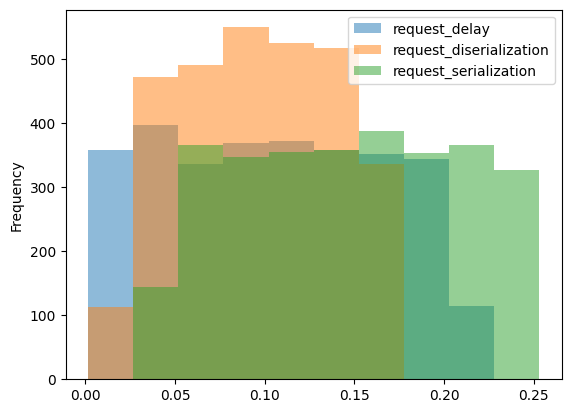

In [540]:
request_delays.plot.hist(alpha=0.5)

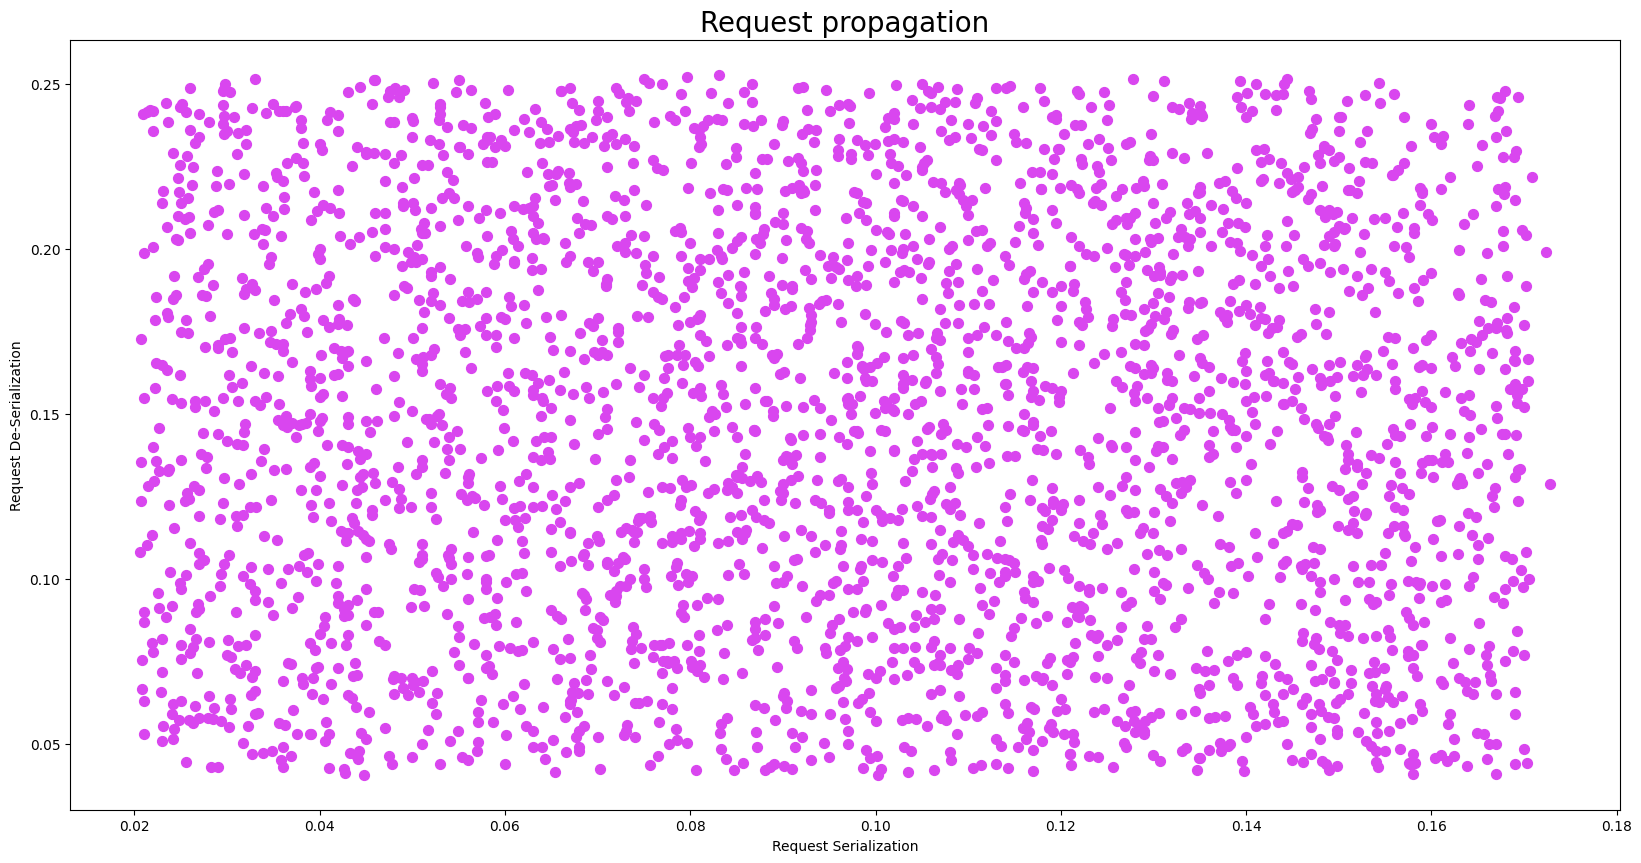

In [541]:
plt.figure(figsize=(20,10))
plt.title("Request propagation", size = 20)
plt.xlabel("Request Serialization")
plt.ylabel("Request De-Serialization")
plt.scatter(request_delays['request_diserialization'], request_delays["request_serialization"] , c="#d946ef", s= 50)
plt.show()
